<a href="https://colab.research.google.com/github/Balaji-Udayagiri/C/blob/master/KDAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from datetime import datetime
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/'Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
def convert_to_date(x):
    return datetime.strptime(str(x), '%Y%m%d')
 
def convert_to_datep(x):
    return datetime.strptime(str(x), '%m/%d/%Y')
 
def convert_to_dated(x):
    return datetime.strptime(str(x), '%Y-%m-%d')

In [ ]:
df = pd.read_csv("HCP_Data_KDAG_Hackathon.csv", parse_dates = ['Time_Period'], date_parser = convert_to_date)
df2 = pd.read_csv("Patient_Data_KDAG_Hackathon.csv", parse_dates = ['Date_of_Visit'], date_parser = convert_to_datep)

/content/drive/MyDrive/Colab Notebooks


In [ ]:
from pandas.tseries.offsets import *

In [ ]:
df2['weekDay'] = df2['Date_of_Visit'].where( df2['Date_of_Visit'] == (( df2['Date_of_Visit'] + Week(weekday=4) ) - Week()), df2['Date_of_Visit'] + Week(weekday=4))
patient = df2.groupby(['Physician_ID', 'weekDay'])['Patient ID'].count()
patient = patient.reset_index()

In [ ]:
j = 0
for i in range(0, 213836):
  phy = patient.loc[i, 'Physician_ID']
  dy = patient.loc[i, 'weekDay']
  val = patient.loc[i, 'Patient ID']

  while (j < 570000) and (df.loc[j, 'Physician_ID'] != phy or df.loc[j, 'Time_Period'] != dy): j += 1

  if j >= 570000: break
  df.loc[j, 'patient'] = val

213836


In [ ]:
#df.to_csv('data.csv', index = False)
df_og = df.copy()

In [ ]:
df = pd.read_csv("data.csv", parse_dates = ['Time_Period'], date_parser = convert_to_dated)

In [ ]:
df

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Specialty,patient
0,axt00001,2019-01-04,0.0,2.80567,1,0,3-Low,0,Dermatologist,0
1,axt00001,2019-01-11,0.0,20.57312,1,0,3-Low,0,Dermatologist,0
2,axt00001,2019-01-18,0.0,6.16010,1,0,3-Low,0,Dermatologist,0
3,axt00001,2019-01-25,0.0,8.95501,1,5,3-Low,0,Dermatologist,0
4,axt00001,2019-02-01,0.0,9.13793,1,0,3-Low,0,Dermatologist,0
...,...,...,...,...,...,...,...,...,...,...
569995,axt10000,2020-01-03,0.0,2.45597,0,0,3-Low,1,Dermatologist,0
569996,axt10000,2020-01-10,0.0,2.38065,0,0,3-Low,0,Dermatologist,0
569997,axt10000,2020-01-17,0.0,7.42171,0,0,3-Low,1,Dermatologist,0
569998,axt10000,2020-01-24,0.0,5.39345,0,0,3-Low,1,Dermatologist,0


In [ ]:
df = df.drop(['Speaker_Programs_Attended', 'Vouchers_Dropped'], axis = 1)

In [ ]:
df_timed = df.copy()
df_timeIndexed = df.set_index('Time_Period')

In [ ]:
#no of sales call in last 51 week for each doc
doctors = df_timeIndexed['2019-01-04'] [['Physician_ID', 'Physician_Segment']].reset_index().drop(['Time_Period'], axis = 1)

callDet = [sum(df.loc[i*57-51:i*57, 'Sales_Rep_Calls']) for i in range(1, 10001)]

doctors = doctors.join(pd.DataFrame(callDet, columns=['NoOfCalls']))

<ipython-input-14-fc3d82fcf12e>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  doctors = df_timeIndexed['2019-01-04'] [['Physician_ID', 'Physician_Segment']].reset_index().drop(['Time_Period'], axis = 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Physician_Segment', 'Specialty']]).toarray())
df = df.join(encoder_df)
df_encoded = df

In [ ]:
df = df.drop(['Physician_Segment', 'Specialty'], axis = 1)
df_encoded = df

In [ ]:
df = df_encoded

In [ ]:
df = df.drop(['Physician_ID', 'Time_Period'], axis = 1)

In [ ]:
df.columns = df.columns.map(str)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df[['Market_Rx', 'patient']] = scaler.fit_transform(df[['Market_Rx', 'patient']])

In [ ]:
df

,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Emails_Delivered,patient,0,1,2,3,4,5
0,0.0,0.010792,1,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.079137,1,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.023696,1,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.034447,1,5,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.035150,1,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
569995,0.0,0.009447,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
569996,0.0,0.009158,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
569997,0.0,0.028549,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
569998,0.0,0.020747,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
#df.to_csv('dataClean.csv', index = False)
df = pd.read_csv('dataClean.csv')

In [ ]:
data_scaled = df.to_numpy()

In [ ]:
data_scaled[:, 2:5][data_scaled[:, 2:5] > 0] = 1  #setting channels column value with non zero value to 1

In [ ]:
features=data_scaled[:, 1:]
target=data_scaled[:,[1, 5]]

In [ ]:
X = []
Y = []
Y2 = []

In [ ]:
for i in range(0, 10000):
  for j in range(0, 5):
    s_id = i*57+j
    e_id = s_id+52
    X.append(features[s_id:e_id, :])
    Y.append(target[e_id:e_id+1, :1])
    Y2.append(target[e_id:e_id+1, 1:])

In [ ]:
X = np.array(X)
Y = np.array(Y)
Y2 = np.array(Y2)

In [ ]:
Y.reshape((50000, 1))
Y2.reshape((50000, 1))

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123, shuffle = True)
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, Y2, test_size=0.2, random_state=123, shuffle = True)

In [ ]:
import tensorflow as tf

In [ ]:
win_length = 52
num_features = 11
output_feature = 1

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.4)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.4)) 
#model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
#model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(output_feature)

#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    # patience=2,
                                                    # mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:


history = model.fit(x_train, y_train, epochs=30,
                    batch_size = 32,
                    shuffle=True)
                    # callbacks=[early_stopping]

Epoch 1/30
1250/1250 [==============================] - 208s 166ms/step - loss: 2.7931e-04 - mean_absolute_error: 0.0118
Epoch 2/30
1250/1250 [==============================] - 204s 163ms/step - loss: 2.7770e-04 - mean_absolute_error: 0.0118
Epoch 3/30
1250/1250 [==============================] - 209s 167ms/step - loss: 2.7464e-04 - mean_absolute_error: 0.0117
Epoch 4/30
1250/1250 [==============================] - 208s 166ms/step - loss: 2.7289e-04 - mean_absolute_error: 0.0117
Epoch 5/30
1250/1250 [==============================] - 207s 166ms/step - loss: 2.7098e-04 - mean_absolute_error: 0.0117
Epoch 6/30
1250/1250 [==============================] - 205s 164ms/step - loss: 2.6730e-04 - mean_absolute_error: 0.0116
Epoch 7/30
1250/1250 [==============================] - 208s 166ms/step - loss: 2.6512e-04 - mean_absolute_error: 0.0116
Epoch 8/30
1250/1250 [==============================] - 207s 165ms/step - loss: 2.6488e-04 - mean_absolute_error: 0.0116
Epoch 9/30
1250/1250 [==========

In [ ]:
#model_11 = model
model.save('modelRxwithX.h5')
#model = tf.keras.models.load_model('modelRx.h5')

In [ ]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model3.add(tf.keras.layers.LeakyReLU(alpha=0.4)) 
model3.add(tf.keras.layers.LSTM(128, return_sequences=True))
model3.add(tf.keras.layers.LeakyReLU(alpha=0.4)) 
#model.add(tf.keras.layers.Dropout(0.3)) 
model3.add(tf.keras.layers.LSTM(64, return_sequences=False))
#model.add(tf.keras.layers.Dropout(0.3)) 
model3.add(tf.keras.layers.Dense(output_feature))

In [ ]:
model3.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model3.fit(x_train3, y_train3, epochs=10,
                    batch_size = 32,
                    shuffle=True)
                    # callbacks=[early_stopping]

Epoch 1/10
1250/1250 [==============================] - 243s 191ms/step - loss: 3.5524e-04 - mean_absolute_error: 0.0109
Epoch 2/10
1250/1250 [==============================] - 232s 186ms/step - loss: 2.6955e-04 - mean_absolute_error: 0.0098
Epoch 3/10
1250/1250 [==============================] - 231s 184ms/step - loss: 2.6146e-04 - mean_absolute_error: 0.0095
Epoch 4/10
1250/1250 [==============================] - 234s 187ms/step - loss: 2.7449e-04 - mean_absolute_error: 0.0096
Epoch 5/10
1250/1250 [==============================] - 231s 184ms/step - loss: 2.6299e-04 - mean_absolute_error: 0.0094
Epoch 6/10
1250/1250 [==============================] - 259s 208ms/step - loss: 2.5003e-04 - mean_absolute_error: 0.0091
Epoch 7/10
1250/1250 [==============================] - 249s 199ms/step - loss: 2.4942e-04 - mean_absolute_error: 0.0091
Epoch 8/10
1250/1250 [==============================] - 233s 187ms/step - loss: 2.4623e-04 - mean_absolute_error: 0.0090
Epoch 9/10
1250/1250 [==========

In [ ]:
# model_31 = model3
# model3.save('weightspatient.h5')
# model3 = tf.keras.models.load_model('weights.h5')

In [ ]:
x_pred = []

for i in range(1, 10001):
  x_pred.append(data_scaled[i*57-52:i*57, 1:])

x_pred = np.array(x_pred)

In [ ]:
model_output1 = model.predict(x_pred)
model_output3 = model3.predict(x_pred)

313/313 [==============================] - 23s 69ms/step


In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(data_scaled[:, 1:], data_scaled[:, 0:1], test_size=0.000001, random_state=123, shuffle = True)

In [ ]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(128, input_dim=11, activation='relu'))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(8, activation='relu'))

#Output layer
model2.add(tf.keras.layers.Dense(1, activation='linear'))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

history = model2.fit(x_train2, y_train2, validation_split=0.2, epochs =15)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1536      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 8)                 264       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trai

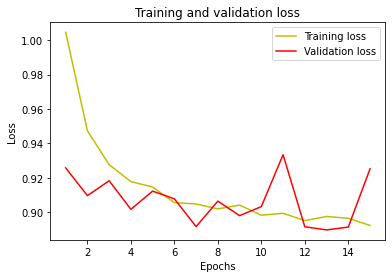

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# model2.save('weights2.h5')
# model2 = tf.keras.models.load_model('weights2.h5')

In [ ]:
x_pred2 = df[0:570000:57].iloc[:, 1:]
x_pred2 = x_pred2.reset_index()
x_pred2 = x_pred2.drop(['index'], axis=1)

In [ ]:
x_pred2

,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Emails_Delivered,patient,0,1,2,3,4,5
0,0.037773,1,0,0,0.003337,0.0,0.0,1.0,1.0,0.0,0.0
1,0.016259,0,0,0,0.003344,0.0,0.0,1.0,1.0,0.0,0.0
2,0.012183,0,0,0,0.003489,0.0,0.0,1.0,1.0,0.0,0.0
3,0.004038,0,0,0,0.002959,0.0,0.0,1.0,1.0,0.0,0.0
4,0.007876,1,0,0,0.021102,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.017167,0,0,0,0.003529,0.0,0.0,1.0,1.0,0.0,0.0
9996,0.000059,0,0,0,0.006173,0.0,1.0,0.0,0.0,0.0,1.0
9997,0.021809,0,0,0,0.003709,0.0,0.0,1.0,1.0,0.0,0.0
9998,0.009332,1,0,0,0.022975,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
x_pred2.iloc[:, 0] = pd.DataFrame(model_output1[:, 0])
x_pred2.iloc[:, 4] = pd.DataFrame(model_output3[:, 0])

In [ ]:

doctors

,Physician_ID,Physician_Segment,NoOfCalls
0,axt00001,3-Low,31
1,axt00002,3-Low,9
2,axt00003,3-Low,9
3,axt00004,3-Low,13
4,axt00005,1-High,38
...,...,...,...
9995,axt09996,3-Low,9
9996,axt09997,2-Medium,2
9997,axt09998,3-Low,11
9998,axt09999,1-High,28


In [ ]:
x_pred2

In [ ]:
x_pred2_sales = x_pred2.copy()
x_pred2_sample = x_pred2.copy()
x_pred2_email = x_pred2.copy()

x_pred2_sales.iloc[:, 1:4] = 1, 0, 0
x_pred2_sample.iloc[:, 1:4] = 0, 1, 0
x_pred2_email.iloc[:, 1:4] = 0, 0, 1

In [ ]:
x_pred2_sales = np.array(x_pred2_sales)
x_pred2_sample = np.array(x_pred2_sample)
x_pred2_email = np.array(x_pred2_email)


In [ ]:
y_sales = model2.predict(x_pred2_sales)
y_sample = model2.predict(x_pred2_sample)
y_email = model2.predict(x_pred2_email)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_sales = y_sales[:, np.newaxis]
y_sample = y_sample[:, np.newaxis]
y_email = y_email[:, np.newaxis]

In [ ]:
channel_rx = np.concatenate((y_sales, y_sample, y_email), axis = 1)

In [ ]:
#n = 2500 provides 0.4271
n = 0
sampleId = sorted(range(len(y_sample)), key = lambda sub: y_sample[sub])[-2500:]
sampleId = sorted(sampleId)

In [ ]:
channel = np.argmax(channel_rx, axis = 1)
brandRx = np.amax(channel_rx, axis = 1)


In [ ]:
sId = 0
k = 0



#for a2 = 0.4, a1 = 0 accuracy is 52.999
a1 = 0
a2 = 0.4
spCt = 0

for i in range(0, 10000):
  phy_seg = doctors.iloc[i, 1][0]
  callsNo = doctors.iloc[i, 2]

  while sId < 2500 and sampleId[sId] < i:
    sId += 1

  if (phy_seg == '1' and callsNo >= 48) or (phy_seg == '2' and callsNo >= 24) or (phy_seg == '3' and callsNo >= 12):
    if channel_rx[i, 1] > channel_rx[i, 2]+a1 and spCt < 2500 :
      channel[i] = 1
      brandRx[i] = channel_rx[i, 1]
      spCt += 1
    else:
      channel[i] = 2
      brandRx[i] = channel_rx[i, 2]
  elif spCt < 2500:
    channel[i] = np.argmax(channel_rx[i], axis = 0)
    brandRx[i] =  np.amax(channel_rx[i], axis = 0)
    spCt += (channel[i] == 1)
  else:
    if channel_rx[i, 0]+a2 > channel_rx[i, 2]:
      channel[i] = 0
      brandRx[i] = channel_rx[i, 0]
    else:
      channel[i] = 2
      brandRx[i] = channel_rx[i, 2]

In [ ]:

"""
sId = 0
k = 0
for i in range(0, 10000):
  if sId < 2500 and sampleId[sId] == i:
    channel[i] = 1
    brandRx[i] = channel_rx[i, 1]
    sId += 1
  elif channel_rx[i, 0] > channel_rx[i, 2]:
    phy_seg = doctors.iloc[i, 1][0]
    callsNo = doctors.iloc[i, 2]

    if (phy_seg == '1' and callsNo >= 48) or (phy_seg == '2' and callsNo >= 24) or (phy_seg == '3' and callsNo >= 12):
       k += 1
       channel[i] = 2
       brandRx[i] = channel_rx[i, 2]
    else:
      channel[i] = 0
      brandRx[i] = channel_rx[i, 0]
    
    channel[i] = 0
    brandRx[i] = channel_rx[i, 0]
  else:
    channel[i] = 2
    brandRx[i] = channel_rx[i, 2]

print(k)"""



1104


In [ ]:
np.count_nonzero(channel == 0)

3983

In [ ]:
 lastWeekRx = df_timeIndexed['2020-01-31']['Brand_Rx'].sum()
 lastWeekRx = lastWeekRx*1.1

 brandRxAgg = np.sum(brandRx)
 brandRx = brandRx*(lastWeekRx/brandRxAgg)

<ipython-input-295-00e51ed0029c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  lastWeekRx = df_timeIndexed['2020-01-31']['Brand_Rx'].sum()


In [ ]:
brandRxPd = pd.DataFrame(brandRx, columns = ['Expected_TRx'])
channelPd = pd.DataFrame(channel, columns = ['channel'])

bbrandRxPd = pd.concat([doctors['Physician_ID'], brandRxPd], axis = 1)
channelPd = pd.concat([doctors['Physician_ID'], channelPd], axis = 1)


In [ ]:
bbrandRxPd.to_csv('brandRx.csv', index = False)
channelPd.to_csv('channel.csv', index = False)